# Предсказание цен на недвижимость

**Прогнозирование стоимости домов в округе Кинг (штат Вашингтон, США) с помощью построения регрессионных моделей и их анализа. Набор данных состоит из цен на дома в округе Кинг, проданных в период с мая 2014 года по май 2015 года. Данные опубликованы в открытом доступе на платформе Kaggle.**

![Данные с сайта renthub.com по стоимости квартир для аренды в Сиэтле:](https://3.downloader.disk.yandex.ru/preview/8aca6aad94538f9acbd360166ac350ea4ac25e0014102401653b7872ae917f50/inf/mPVh6sIuoUC7gweH3D7_Lmm_lk-iFq_jrspiTW-EThAZQ5rc13GlVTeIlpTIxBusJ1gM4hiLOO4vkN9nyy2dJg%3D%3D?uid=1130000061821153&filename=price_Seattle.jpg&disposition=inline&hash=&limit=0&content_type=image%2Fjpeg&owner_uid=1130000061821153&tknv=v2&size=1500x500)

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model, ensemble
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [329]:
training_data = pd.read_csv('predict_house_price_training_data.csv')
training_data.columns = training_data.columns.str.lower()
training_data = training_data.astype({'ванные': 'int64', 'количество этажей': 'int64'})
training_data

,целевая.цена,спальни,ванные,жилая площадь,общая площадь,количество этажей,вид на воду,просмотрены ранее,состояние,оценка риелтора,площадь без подвала,площадь подвала,год постройки,год реновации,широта,долгота
0,830000,5,3,3490,21780,2,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1,2360,7620,1,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2,2040,8560,1,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1,1940,8376,1,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2,3450,5350,1,0,3,4,9,2590,860,1925,0,47.6389,-122.407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,930000,4,4,5710,24663,2,0,0,3,11,5710,0,2007,0,47.3065,-122.158
15125,400000,3,1,1950,4473,1,0,0,4,6,1530,420,1914,0,47.7094,-122.228
15126,1580000,3,2,3620,14250,2,0,0,3,8,3220,400,2007,0,47.5767,-122.225
15127,339900,4,2,2340,9748,1,0,1,3,8,1610,730,1981,0,47.3363,-122.331


In [249]:
target_variable_name = 'целевая.цена'

In [275]:
for col in training_data:
    q3 = training_data[col].quantile(q=.75)
    training_data_cleaned = training_data[training_data[col] < q3]
    
print(training_data.shape)
print(training_data_cleaned.shape)

(15129, 16)
(11331, 16)


In [276]:
training_values = training_data_cleaned[target_variable_name]
training_points = training_data_cleaned.drop([target_variable_name], axis='columns')

In [277]:
linear_regression_model = linear_model.LinearRegression()
random_forest_model = ensemble.RandomForestRegressor(n_estimators=1000)

In [278]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [279]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(n_estimators=1000)

In [280]:
test_data = pd.read_csv('predict_house_price_test_data.csv')
test_data.columns = test_data.columns.str.lower()
test_data = test_data.astype({'ванные': 'int64', 'количество этажей': 'int64'})
print(test_data.shape)
test_data.head()

(6484, 16)


,целевая.цена,спальни,ванные,жилая площадь,общая площадь,количество этажей,вид на воду,просмотрены ранее,состояние,оценка риелтора,площадь без подвала,площадь подвала,год постройки,год реновации,широта,долгота
0,260000,3,1,1300,10139,1,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2,3280,6845,2,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1,1220,12426,1,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2,2880,13500,1,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2,1300,3731,1,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [335]:
test_values = test_data['целевая.цена']
test_points = test_data.drop('целевая.цена', axis='columns')

In [302]:
test_predictions_linear = linear_regression_model.predict(test_points)
test_predictions_linear

array([ 193484.78509878,  968894.4474756 ,  472741.30149177, ...,
       1068497.43974142,  320336.19336231, 1015554.92952213])

In [298]:
test_predictions_random_forest = random_forest_model.predict(test_points)
test_predictions_random_forest

array([ 243457.331     ,  763802.05961905,  311569.132     , ...,
       1392150.85      ,  289444.555     , 1196237.71716667])

### Визуализируем прогноз моделей и настоящие значения из тестовой выборки.

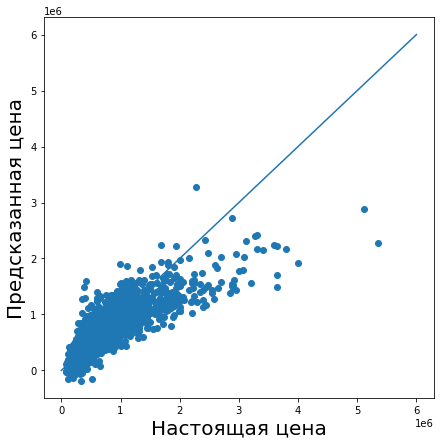

In [316]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear)
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

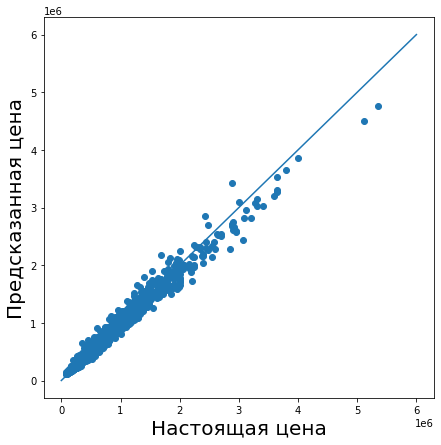

In [315]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values,test_predictions_random_forest)
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

**Модель случайного леса визуально работает лучше.**

### Проверим среднюю абсолютную ошибку и среднеквадратичное отклонение.

In [340]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear) 
mean_squared_error_linear_model =  mean_squared_error(test_values, test_predictions_linear)

In [341]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

In [346]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model, 
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
        mean_absolute_error_random_forest_model, 
        np.sqrt(mean_squared_error_random_forest_model)))

MAE: 126189.47, RMSE: 200679.68 для модели линейной регрессии
MAE: 27807.61, RMSE: 51013.13 для модели случайного леса


**Модель случайного леса действительно работает лучше.**

### Вычислим важность признаков:

In [330]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(n_estimators=1000)

In [331]:
random_forest_model.feature_importances_

array([0.00448472, 0.00415015, 0.38958362, 0.0267029 , 0.0016985 ,
       0.01377149, 0.01833873, 0.00414367, 0.21013578, 0.04762451,
       0.00783387, 0.02390517, 0.00324061, 0.20397579, 0.04041049])

In [355]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_
feature_importance = feature_importance.sort_values(by = 'Важность признака', ascending=False, ignore_index=True)
feature_importance

,Название признака,Важность признака
0,жилая площадь,0.389584
1,оценка риелтора,0.210136
2,широта,0.203976
3,площадь без подвала,0.047625
4,долгота,0.040410
5,общая площадь,0.026703
6,год постройки,0.023905
7,просмотрены ранее,0.018339
8,вид на воду,0.013771
9,площадь подвала,0.007834


### Наиболее значимыми признаками являются:

   * Жилая площадь
   * Оценка риэлтора
   * Широта

На карте видно, что центр Сиэтла находится в верхней половине карты. Соответственно, чем ближе к нему, тем дороже будет квартира.

![Карта Сиэтла](https://3.downloader.disk.yandex.ru/preview/18cb712bfed57a5c3e6ef8ba7f191b6f3b933da56d5d8b3f86718d69202e2a4c/inf/EXMUt-Y9eZbC47CE2sIT7Tn5rbOb3e75YGVtstCTn1uZVTAQWRA9DeVBXPCMc2ZHVtKaYV4QUdNRg1fT2W7lvg%3D%3D?uid=1130000061821153&filename=map_King_county.jpg&disposition=inline&hash=&limit=0&content_type=image%2Fjpeg&owner_uid=1130000061821153&tknv=v2&size=1058x420)